# The Perceptron

- The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt

## The Threshold logic unit (TLU)

- The inputs and output are numbers, and each input connection is associated with a weight. 

- The TLU computes a weighted sum of its inputs:
    (z = w1 x1 + w2 x2 + ⋯ + wn xn = x⊺ w)

- Then, it applies a step function to that sum and outputs the result: 
    hw(x) = step(z), where z = x⊺ w.


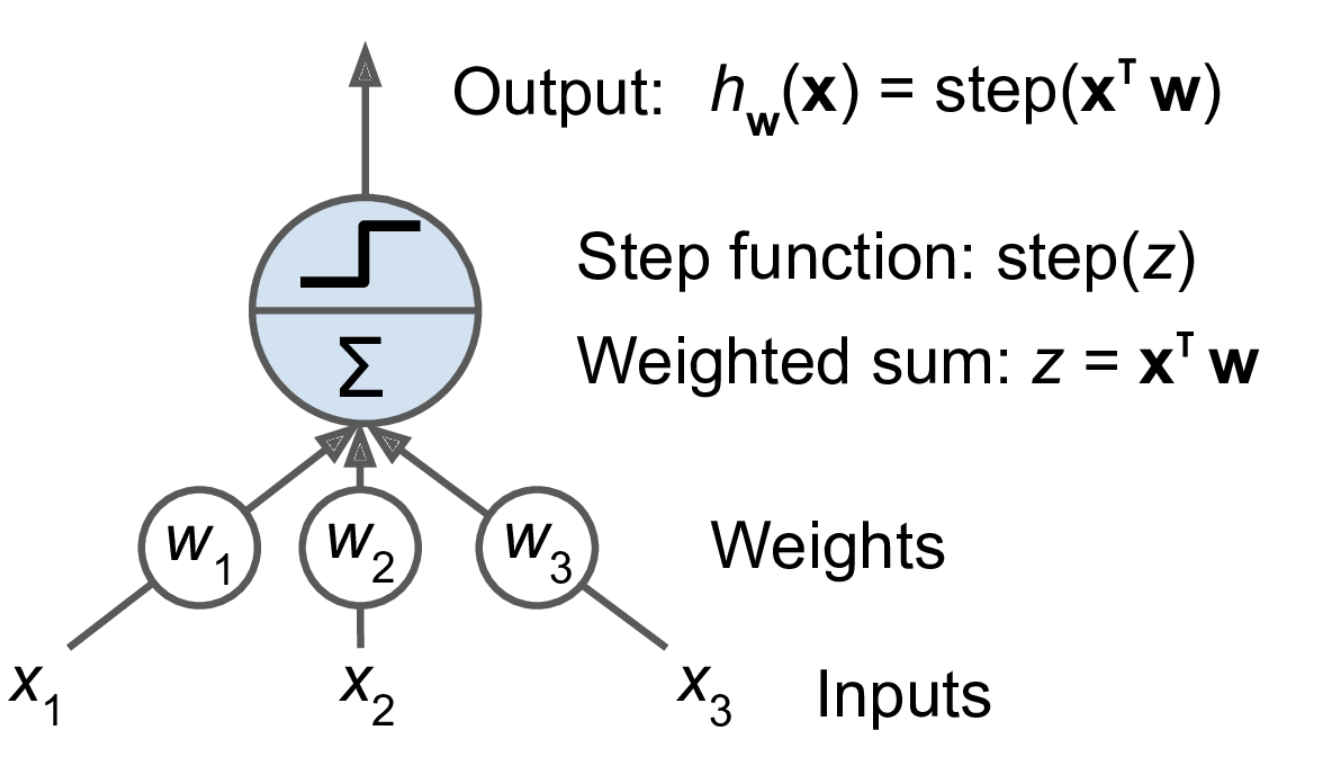

 

- The step functions used were basic, such as the sign fn: 
```
1 if z < 0
0 if z=0
1 if z > 0
```
- or the heavside fn:
```
0 if z < 0
1 if z >= 0
```


- A Perceptron is simply composed of a single layer of TLUs,7 with each TLU connected to all the inputs. 

- When all the neurons in a layer are connected to every neuron in the previous layer (i.e., its input neurons), the layer is called a fully connected layer, or a dense layer. 

- The inputs of the Perceptron are fed to special passthrough neurons called input neurons: they output whatever input they are fed. All the input neurons form the input layer. 

- Moreover, an extra bias feature is generally added (x0 = 1): it is typically represented using a special type of neuron called a bias neuron, which outputs 1 all the time

- A Perceptron with two inputs and three outputs is represented below. This Perceptron can classify instances simultaneously into three different binary classes, which makes it a multilabel classifier

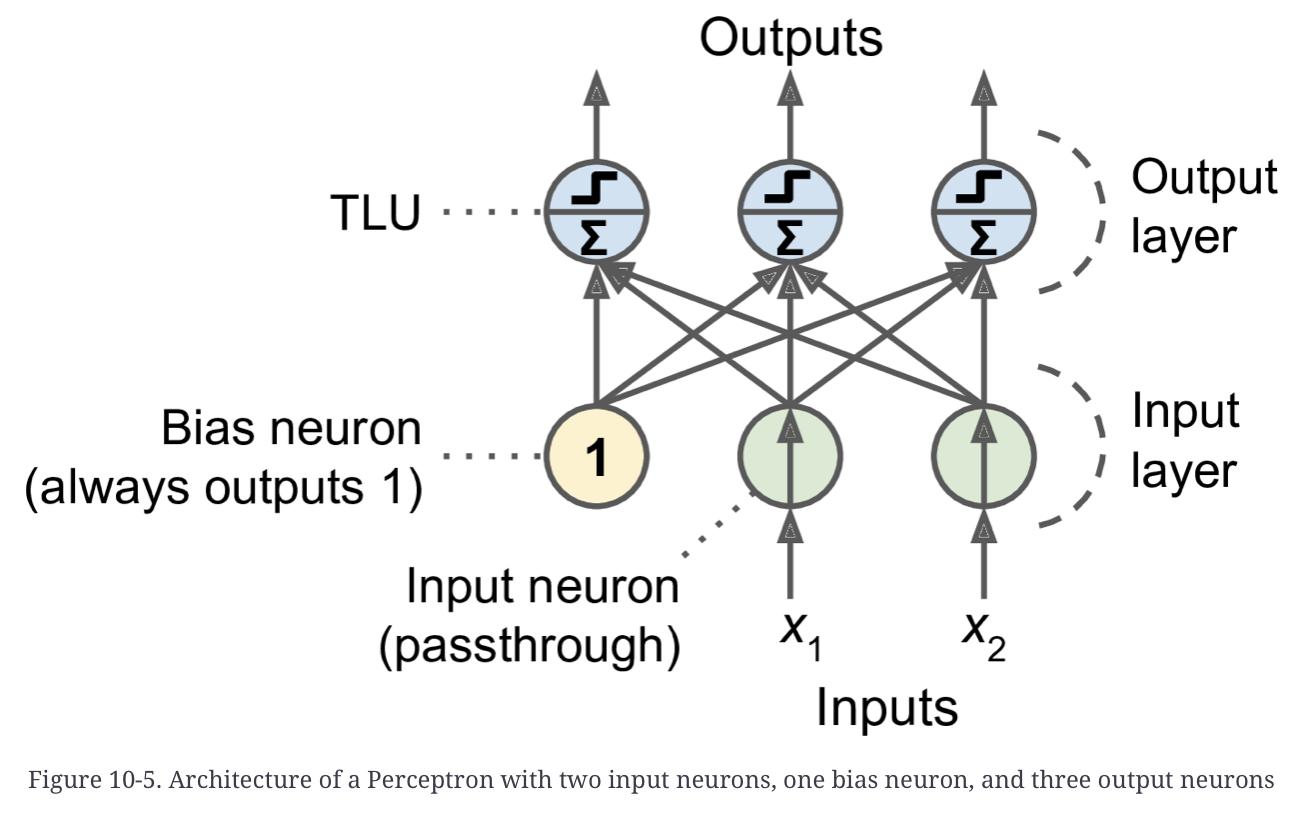

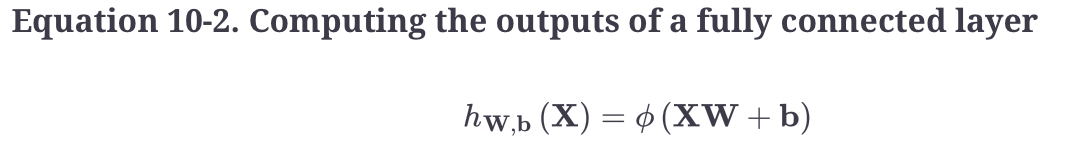

In the above ^

- X is the input 
- W contains all the connection weights except for the ones from the bias neuron
    - It has one row per input neuron and one column per artificial neuron in the layer
- b (bias vector) has all  connection weights between the bias neuron and the artificial neurons. It has one bias term per neuron
- ϕ is called the activation function
    - when the artificial neurons are TLUs, it is a step function


### Training a Perceptron

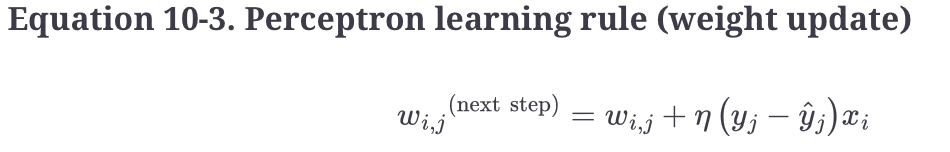

- w(i, j) is the connection weight between the ith input neuron and the jth output neuron.
- x(i) is the ith input value of the current training instance.
- yhat(j) is the output of the jth output neuron for the current training instance.
- y(j) is the target output of the jth output neuron for the current training instance.
- η is the learning rate.

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width features
y = (iris.target == 0).astype(np.int)  # Iris setosa?


per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


In [2]:
y_pred


array([0])

- Contrary to Logistic Regression classifiers, Perceptrons do not output a class probability; rather, they make predictions based on a hard threshold. 
- This is one reason to prefer Logistic Regression over Perceptrons

# Multilayer Perceptrons
- Perceptron's cannot solve the XOR (exclusive or) problem
- However, it turns out stacking multiple perceptrons can -- this is called a multilayer perceptron

- MLPs have the following:
    - One (passthrough) input layer
    - One or more layers of TLUs, called hidden layers
    - One final layer of TLUs called the output layer

- Every layer except the output layer includes a bias neuron and is fully connected to the next layer

- The signal flows only in one direction so its called a feedforward neural network

- An MLP is an example of an ANN
- When an ANN has many layers its called Deep (DNN)

- To train an NN, we use Backpropagation (introduced in this 1996 paper https://apps.dtic.mil/sti/citations/ADA164453 )
    - Backprop is Gradient Descent using an efficient technique for computing the gradients automatically
    
### Backprop

- Finds out how each connection weight and each bias term should be tweaked in order to reduce the error
- Once it has these gradients, it just performs a regular Gradient Descent step

### Autodiff

- **Automatic Differentiation** are techniques to automatically calculate the gradients used in Backpropagation

- The technique used in Backpropagation is called **reverse-mode autodiff**


## The Backpropagation Algorithm

1. Handles one mini-batch at a time (where each batch has a number of input samples). It goes through entire training set a number of times (each time is called an epoch)
2. Each mini-batch passes through input layer sequentially through the hidden and output layers, where the output of each layer is the input to the next
    - This is the forward pass
    - Each layer's output is stored for backprop
3. Measures the network’s output error compared to truth values
4. Chain Rule 
    - Computes how much each output connection contributed to the error
    - Measures how much of these error contributions came from each connection in the layer below, using the chain rule, working backward until the it reaches the input layer
    - This is called the Reverse Pass and measures the error gradient across all the connection weights in the network

5. Performs a Gradient Descent step using the gradient calculated




## Activation Functions

- The authors of the backprop paper used a logistic funciton logistic (sigmoid) function
    - σ(z) = 1 / (1 + exp(–z))
    - Ranges from (0, 1)

- Needed because step functions only have flat segments, so there is no gradient to work with (Gradient Descent cannot move on a flat surface)

- Logistic function has a well-defined nonzero derivative everywhere, allowing Gradient Descent to make some progress at every step

- The hyperbolic tangent function: 
    - tanh(z) = 2σ(2z) – 1
    - "S" shaped but ranges from (-1, 1)

- The Rectified Linear Unit function:
    - ReLU(z) = max(0, z)
    - has become the default, as it works well in practice 

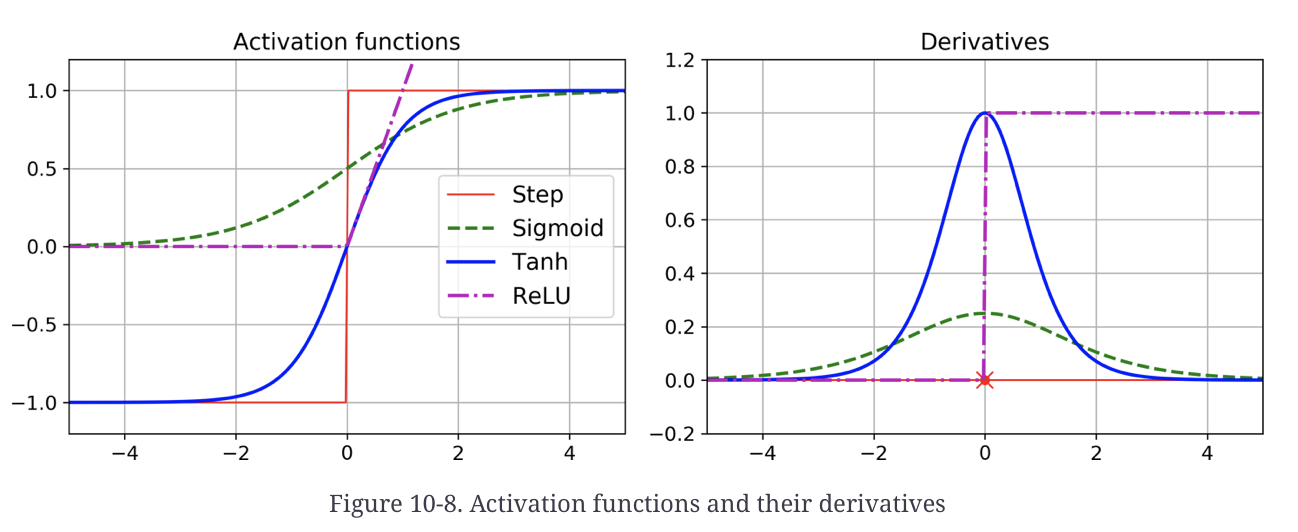

- These nonlinear functions allow for the DNN to solve complex problems
- If only linear functions were computed, then the DNN is equivelent to one giant layer

# MLP Regression

1. Single Variable
    - Need a single output neuron: its output is the predicted value
    - Example: the price of a house, given many of its features
2. Multivariate (predict multiple values at once)
    - One output neuron per output dimension
    - Example: to locate the center of an object in an image, you need to predict 2D coordinates, so you need two output neurons
    - Example: to place a bounding box around the object, then you need two more numbers: the width and the height of the object. So, you end up with four output neurons.

### Activation

- Generally don't want to use any activation for the output neurons
- However, if you wanted only positive values you could use ReLU or SoftPlus:
    - softplus(z) = log(1 + exp(z))

- Or if you want to ensure it falls in a range we can use logistic (0 to 1) or tanh (-1 to 1)

### Loss
- Generally use MSE, however if lots of outliers, we can use MAE
- Or Huber loss, which is a combination of both

### Typical Architecture
```
input neurons: One per input feature (e.g., 28 x 28 = 784 for MNIST)

hidden layers: Depends on the problem, but typically 1 to 5

neurons per hidden layer: Depends on the problem, but typically 10 to 100

output neurons: 1 per prediction dimension

Hidden activation: ReLU

Output activation: None, or ReLU/softplus (if positive outputs) or logistic/tanh (if bounded outputs)

Loss function: MSE or MAE/Huber (if outliers)
```

# MLP Classification

1. Binary
    - single output neuron using the logistic activation function
    - this value is the probability of the positive class

2. Multi-label Binary
    - Predicting Multiple things at once
    - One output neuron for each positive class
    - Example:
        - For an email classifier predicting ham or spam, as well as urgent or non-urgent
        - Need two output neurons, each using logistic activation
        - Probabalities won't add to 1, because we are predicting combination of labels (nonurgent ham, urgent ham, nonurgent spam) 
    
3. Multi-class
    - One output neuron per class
    - Softmax activation function for the whole output layer
        - Ensures all the probabilities are between 0 and 1 and that they add up to 1

### Loss
- Dealing with probability distributions so cross-entropy loss (log loss) is a good idea



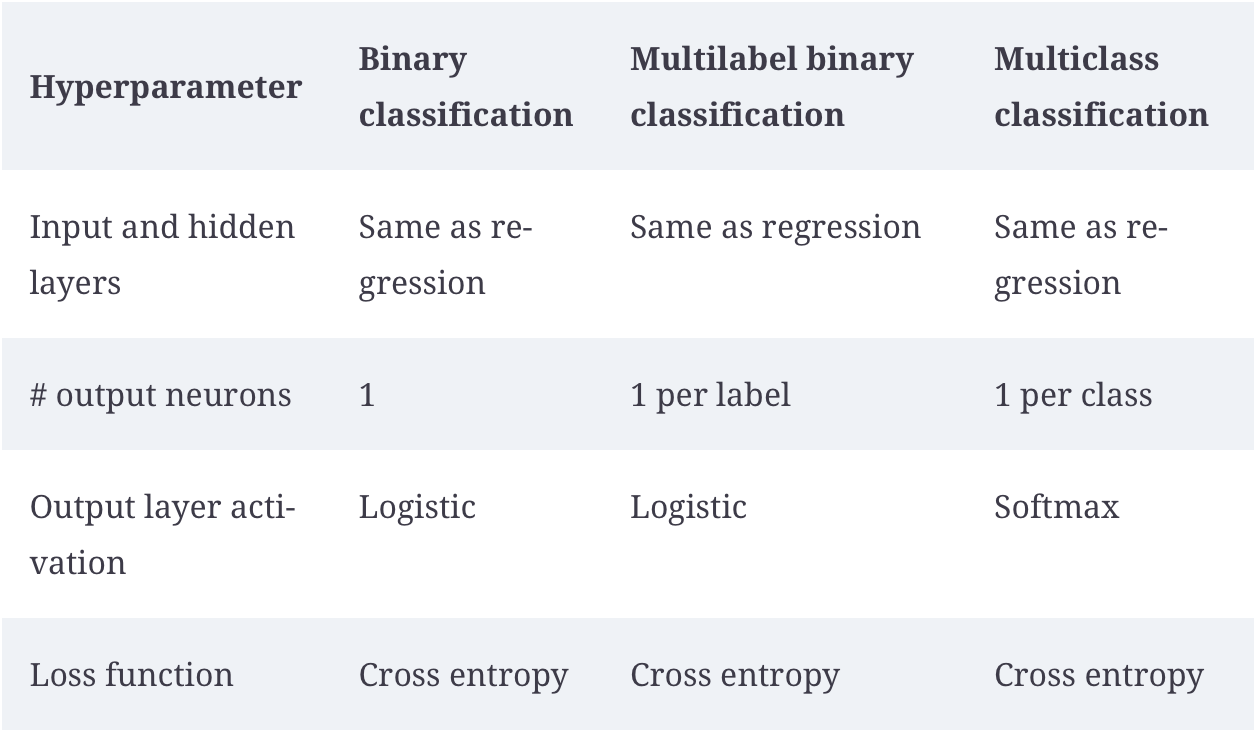

# MLPs with Keras
- Keras was developed by François Chollet, open-sourced in 2015
- Tensorflow comes with its own keras implementation tf.keras
    - where tensorflow is the backend of keras in this case

- Pytorch (facebook) was regarded as much simpler and uses a similar API to keras, however, Tensorflow 2.0 simplified things greatly 


In [5]:
import tensorflow as tf
from tensorflow import keras


In [6]:
print(tf.__version__)
print(keras.__version__)

2.8.2
2.8.0


### MNIST Image Classifier With Sequential API

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape

4431872/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

### Create Validation Set

- Also, divide by 255 to scale down pixel intensities between 0 and 1


In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

Below:
    - could also keras.layers.InputLayer prior to flatten layer

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [13]:
# can also specify like this
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [21]:
model.layers[1].name

'dense_3'

In [23]:
# access all params
weights, biases = model.layers[1].get_weights()
weights

array([[ 0.04959235, -0.0591288 ,  0.05315776, ...,  0.03541678,
         0.01523015, -0.01109076],
       [ 0.03151646,  0.03675943,  0.05716911, ..., -0.06355904,
         0.01856465,  0.07080403],
       [ 0.04184368,  0.06709541,  0.00456732, ...,  0.07040621,
        -0.04935159,  0.06558192],
       ...,
       [ 0.03048291, -0.02605998, -0.06639245, ..., -0.03536481,
         0.06869055,  0.04867011],
       [ 0.00665601,  0.01392256,  0.03910627, ...,  0.07262355,
         0.02022449, -0.0143923 ],
       [-0.06132764,  0.02979597, -0.03359805, ...,  0.01306833,
        -0.01678851,  0.02632404]], dtype=float32)

In [24]:
weights.shape, biases.shape

((784, 300), (300,))

If you ever want to use a different initialization method, you can set kernel_initializer (kernel is another name for the matrix of connection weights) or bias_initializer when creating the layer

### Compile Model

- we use the "sparse_categorical_crossentropy" loss because:
    - we have sparse labels (0 to 9...for each instance, there is just a target class index)
    - we have exclusive classes

- If instead we had one target probability per class for each instance (such as one-hot vectors, like [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss

- If we were doing binary classification or multilabel binary classification, then:
    - we would use the "sigmoid" (i.e., logistic) activation function in the output layer instead of the "softmax" activation function, 
    - and we would use the "binary_crossentropy"


- If you want to convert sparse labels (i.e., class indices) to one-hot vector labels, use the keras.utils.to_categorical() function. To go the other way round, use the np.argmax() function with axis=1.

- Regarding the optimizer, "sgd" means that we will train the model using simple Stochastic Gradient Descent

- to specify a learning rate for an optimizer, use optimizer=keras.optimizers.SGD(lr=X)

In [25]:
# specify loss, optimizer, and metrics to keep track of
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


In [26]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7069 - accuracy: 0.7691 - val_loss: 0.5113 - val_accuracy: 0.8274
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4851 - accuracy: 0.8328 - val_loss: 0.4450 - val_accuracy: 0.8484
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4396 - accuracy: 0.8462 - val_loss: 0.4471 - val_accuracy: 0.8472
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4126 - accuracy: 0.8552 - val_loss: 0.3959 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3923 - accuracy: 0.8608 - val_loss: 0.3928 - val_accuracy: 0.8632
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3775 - accuracy: 0.8661 - val_loss: 0.3794 - val_accuracy: 0.8702
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3623 - accuracy: 0.8713 - val_loss: 0.3670 - val_accuracy:

### Training Tips
- Specify class_weight in fit is dataset is very skewed
- Specify sample_weight if each instance is skewed
    - Useful if some instances were labeled by experts while others were labeled using a crowdsourcing platform


### Training history
- The fit() method returns a History object containing:
    - training params (history.params)
    - epochs (history.epoch)
    - loss and metrics at each epoch (history.history)

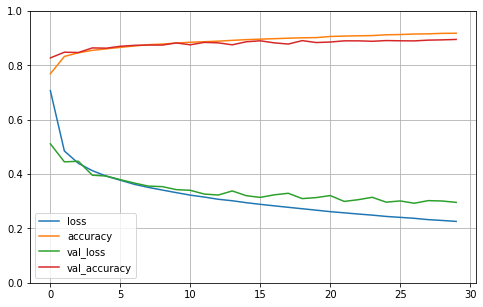

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3315 - accuracy: 0.8814


[0.3315485715866089, 0.8813999891281128]

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [31]:
y_pred = model.predict(X_test) 
np.argmax(y_pred, axis=1)

array([9, 2, 1, ..., 8, 1, 5])

## California Housing Regression

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [33]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 4s 7ms/step - loss: 1.0405 - val_loss: 0.6194
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 0.8713 - val_loss: 0.6860
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5037 - val_loss: 0.4957
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4527 - val_loss: 0.4640
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4347 - val_loss: 0.4491
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4261 - val_loss: 0.4446
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4191 - val_loss: 0.4324
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4124 - val_loss: 0.4293
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4081 - val_loss: 0.4228
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4025 - val_loss: 0.4258

# Complex Models With Functional API

- An example of a nonsequential neural network is a ***Wide & Deep*** neural network

## Wide and Deep
- Introduced in this 2016 paper https://arxiv.org/abs/1606.07792
- Connects all or part of the inputs directly to the output layer
- Makes it possible for the neural network to learn both deep patterns and simple rules at the same time
    - In an MLP, simple patterns can get distorted because data is forced to feed through the entire thing

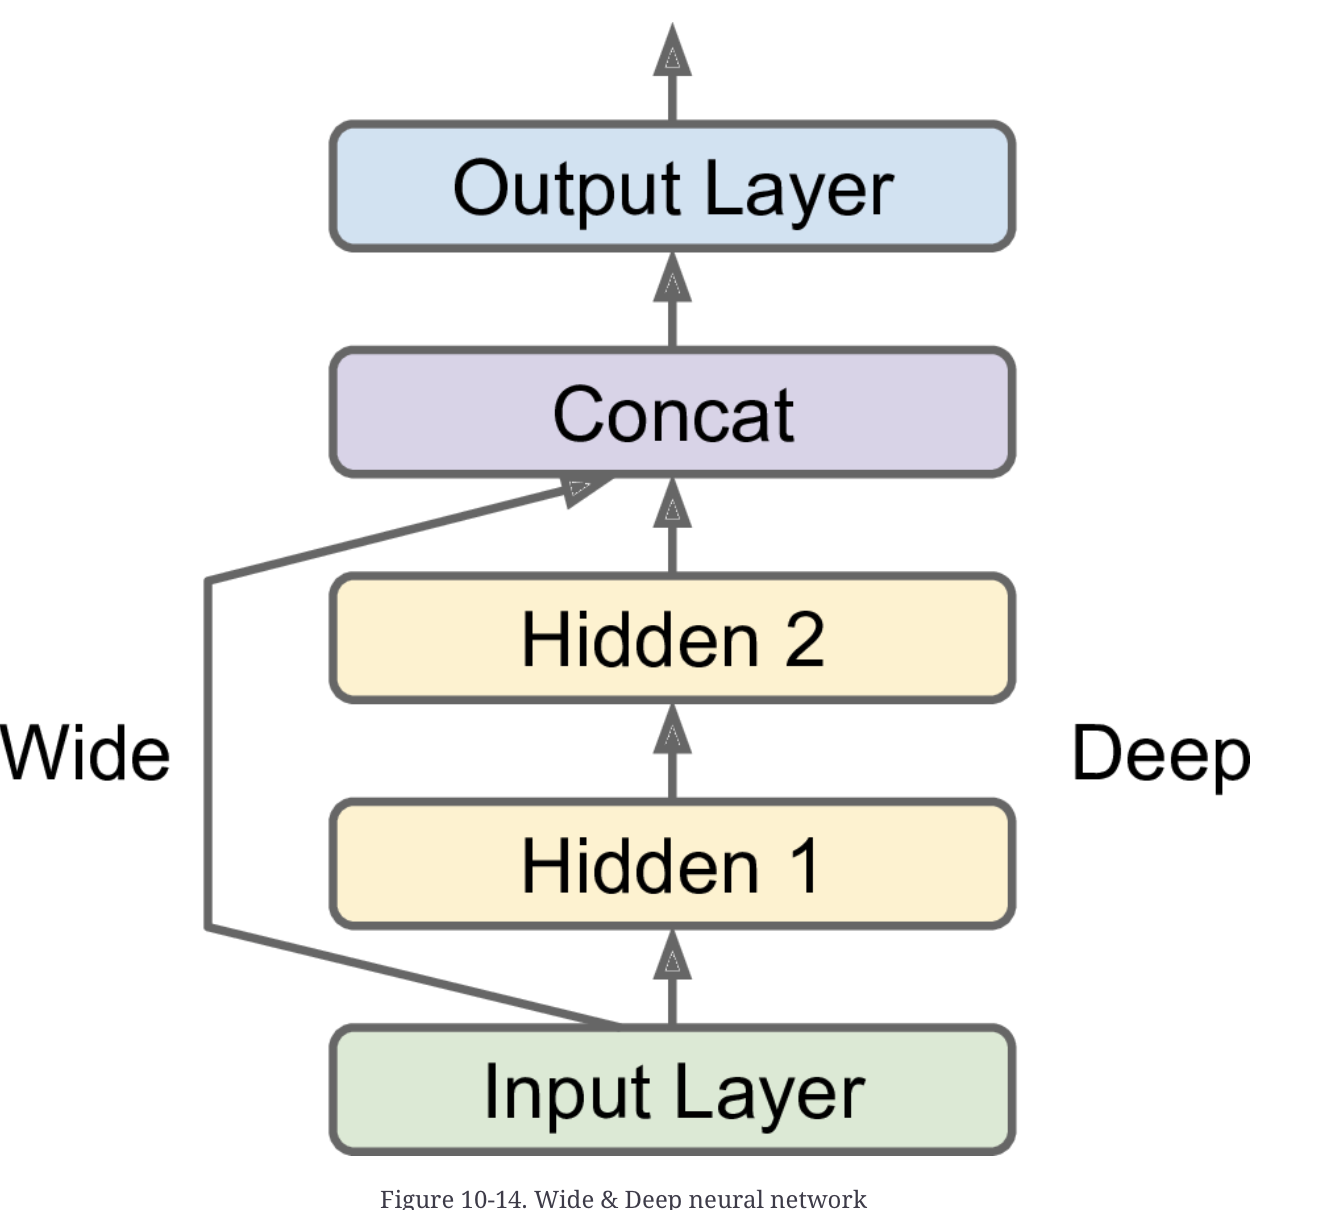

### Wide and Deep for California Housing

In [34]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

But what if you want to send some features through the wide portion and some feature through the deep portion?

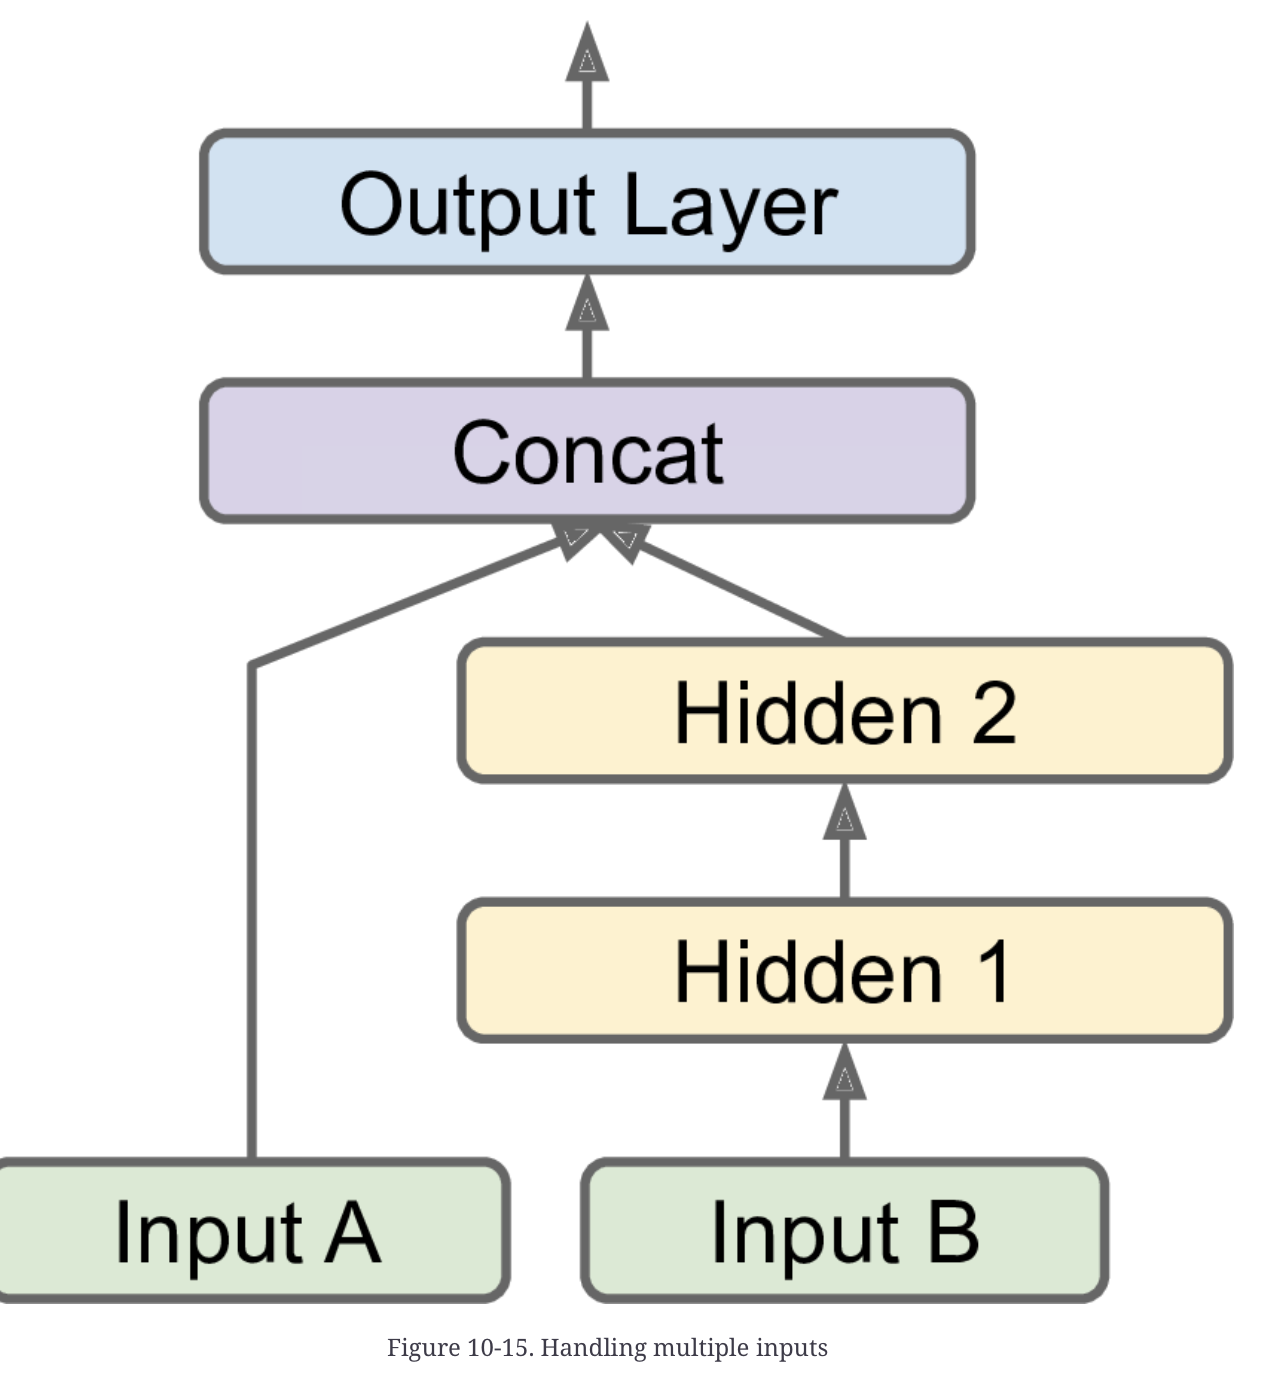

In [35]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

- There are multiple inputs so instead of passing a single input matrix X_train, we must pass a pair of matrices (X_train_A, X_train_B): one per input
- The same is true for X_valid, and also for X_test and X_new when you call evaluate() or predict()

In [36]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 2s 4ms/step - loss: 1.9372 - val_loss: 0.9096
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8057 - val_loss: 0.7710
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7113 - val_loss: 0.7167
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6598 - val_loss: 0.6775
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6296 - val_loss: 0.6478
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6045 - val_loss: 0.6241
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5866 - val_loss: 0.6050
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5700 - val_loss: 0.5895
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5585 - val_loss: 0.5775
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5469 - val_loss: 0.5665
Epoch 11/2

## Multiple Outputs

- Many times you want multiple outputs
    - Example:
        - Locate and classify the main object in a picture. 
        - This is both a regression task (finding the coordinates of the object’s center, as well as its width and height) and a classification task
    
### Multitask classification

- Multiple independent tasks based on the same data
- Might get better results training tasks in a single DNN because DNNs can learn useful things across tasks
    - Example:
        - one output to classify the person’s facial expression (smiling, surprised, etc.)
        - another output to identify whether they are wearing glasses or not

### For Regularization
- a training constraint whose objective is to reduce overfitting and improve generalization
    - Example:
        - add some auxiliary outputs in an NN architecture to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.



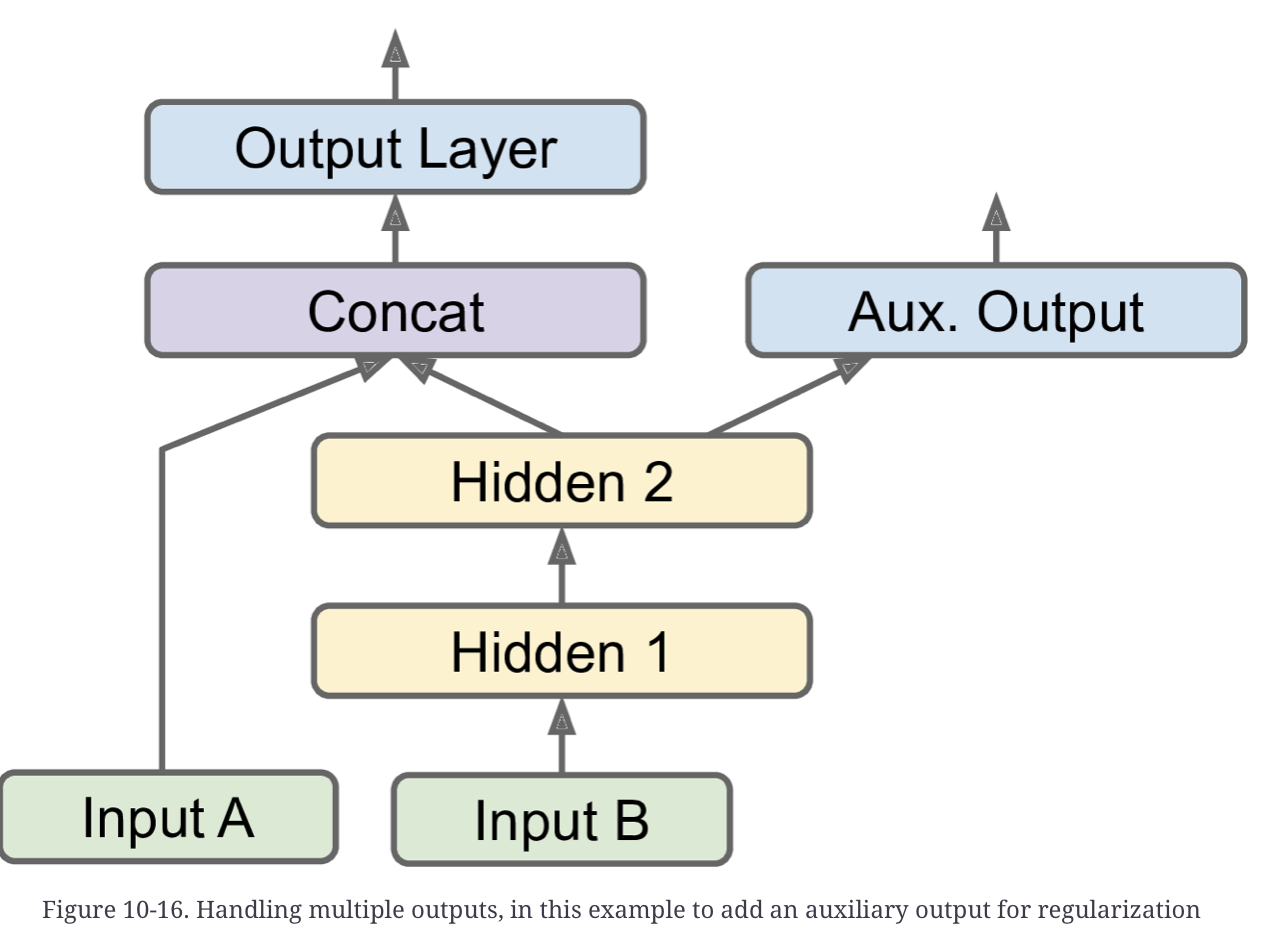

In [37]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
# same up to this point, now we just adjust the output layer
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])



- Each output will need its own loss function.
- Therefore, when we compile the model, we should pass a list of losses
    - if we pass a single loss, Keras will assume that the same loss must be used for all outputs

- Moreover, Keras will add them up all losses to get the final loss used for training

- We care much more about the main output than about the auxiliary output (as its just for regularization)
    - So we want to give the main output’s loss a much greater weight

In [39]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")


- Also need to provide labels for each output. 
- In this example, the main output and the auxiliary output should try to predict the same thing, so they should use the same label
    - So instead of passing y_train, we need to pass (y_train, y_train)

In [40]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))


Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.0894 - main_output_loss: 0.9989 - aux_output_loss: 1.9034 - val_loss: 0.6603 - val_main_output_loss: 0.5924 - val_aux_output_loss: 1.2714
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5699 - main_output_loss: 0.5141 - aux_output_loss: 1.0720 - val_loss: 0.5583 - val_main_output_loss: 0.5097 - val_aux_output_loss: 0.9961
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5513 - main_output_loss: 0.5152 - aux_output_loss: 0.8765 - val_loss: 0.5189 - val_main_output_loss: 0.4820 - val_aux_output_loss: 0.8503
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4801 - main_output_loss: 0.4488 - aux_output_loss: 0.7618 - val_loss: 0.4958 - val_main_output_loss: 0.4665 - val_aux_output_loss: 0.7596
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4793 - main_output_loss: 0.4547 - aux_output_loss: 0.7012 - val_loss

When we evaluate the model, Keras will return the total loss, as well as all the individual losses

In [41]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
total_loss, main_loss, aux_loss

162/162 [==============================] - 0s 3ms/step - loss: 0.3638 - main_output_loss: 0.3511 - aux_output_loss: 0.4779


(0.36379656195640564, 0.35112184286117554, 0.4778686463832855)

Predict will return predictions for each output

In [42]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
y_pred_main, y_pred_aux

(array([[1.9567497],
        [1.858916 ],
        [1.9526522]], dtype=float32), array([[1.9661905],
        [1.961529 ],
        [2.3025863]], dtype=float32))

# Subclass API for Dynamic Models

- Declarative Structure has many advantages:
    - the model can easily be saved, cloned, and shared
    - its structure can be displayed and analyzed
    - the framework can infer shapes and check types, so errors can be caught early (i.e., before any data ever goes through the model)

- However some models involve conditional branching, varying shapes, loops, etc, so we might want a imperative way to write it

- Just do the below; perform the computations you want in the call() method.



In [43]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

#### Above
- Looks very much like the Functional API, except we do not need to create the inputs
    - we just use the input argument to the call() method

- The big difference is that you can do pretty much anything you want in the call() method: for loops, if statements, low-level TensorFlow operations, etc...

- Comes at a cost though:
    - Keras cannot inspect it
    - Cannot save or clone it
    - Easier to make mistakes
    

## Saving and Loading For Sequential and Functional API

- Uses HDF5 format to save both:
    - the model’s architecture (including every layer’s hyperparameters)
    - the values of all the model parameters for every layer (e.g., connection weights and biases)
    - also saves the optimizer (including its hyperparameters and any state it may have)


In [ ]:
model.save("my_keras_model.h5")
model = keras.models.load_model("my_keras_model.h5")

## For Sublassing
- use save_weights() and load_weights() to at least save and restore the model parameters, but you will need to save and restore everything else yourself.

# Callbacks

- If training takes hours, we can save checkpoints throughout training using callbacks

- The fit() method accepts a callbacks argument that lets you specify a list of objects that Keras will call at the start and end of training
    - ***ModelCheckpoint*** callback saves checkpoints of your model at regular intervals during training, by default at the end of each epoch



In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

- Moreover, if you use a validation set during training, you can set *save_best_only=True* when creating the ***ModelCheckpoint***
    - Only saves when performance on the validation set is the best so far
    - Don't need to worry about over-training / over-fitting the model

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True)
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # roll back to best model


### Early Stopping
- Use the EarlyStopping callback to interrupt training when it measures no progress on the validation set for a number of epochs (defined by the patience argument)
    - optionally roll back to the best model

- Combine both callbacks to save checkpoints of your model (in case your computer crashes) and interrupt training early when there is no more progress (to avoid wasting time and resources)

- Can use a large number of epochs since training will stop automatically with no progress

- No need to restore the best model saved because the EarlyStopping callback will keep track of the best weights and restore them for you at the end of training

- TIP: many other callbacks available in the keras.callbacks package and can subclass keras.callbacks.Callback to write your own



In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
